一、創立 app
=============
在這個專案下創一個 app
* python manage.py startapp [app name]

何謂 app? app 可以想成是想讓這個專案擁有那些功能，像是想讓專案有 Blog 系統、購物車系統、學生資料管理系統...等等，這些系統分別就是專案中的其中一個 app。而每個 app 撰寫自己的頁面與功能後，再給專案設定使用此 app，我們的網站就會有此 app 的所有功能了。

比方說，創立一個 blog app:
* python manage.py startapp blog

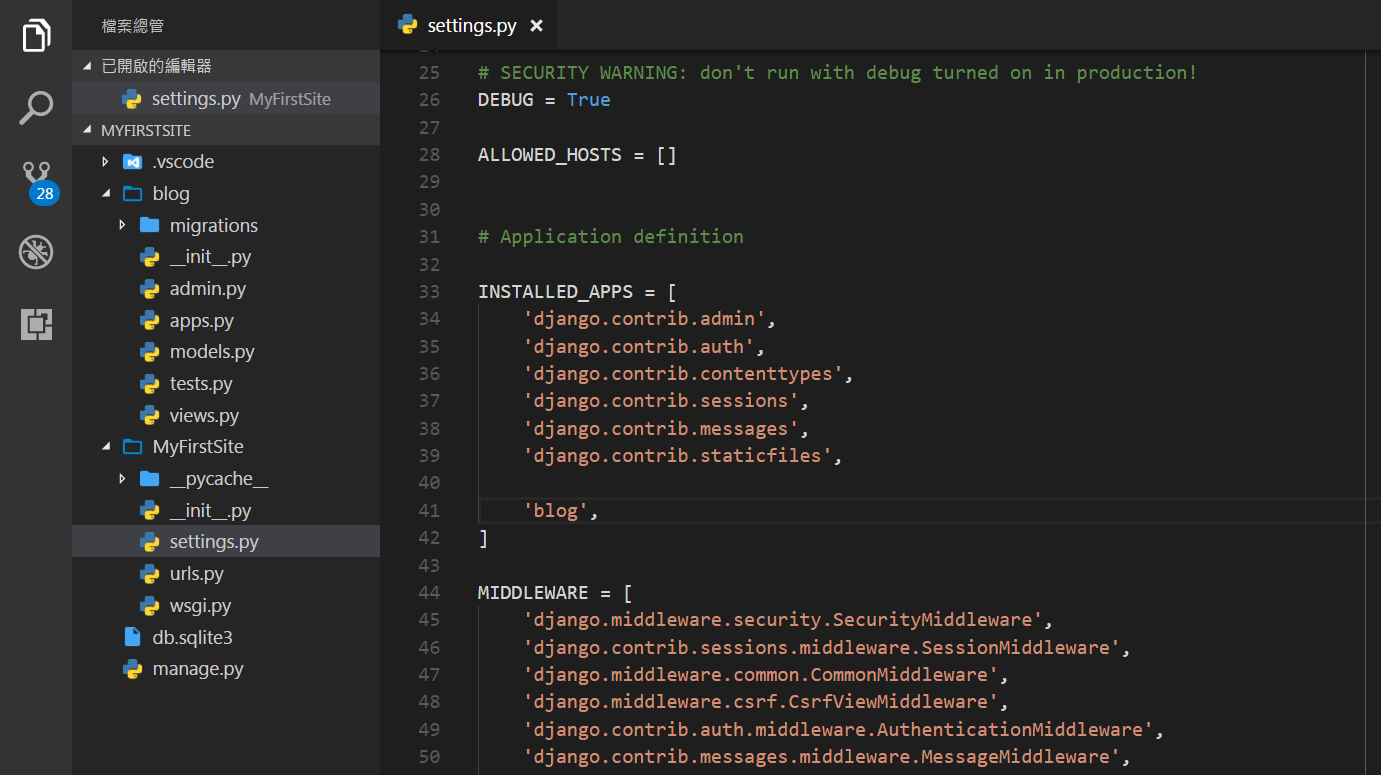

In [1]:
from IPython.display import Image
Image("images/P6.png")


專案資料夾會出現一個 blog 資料夾(之後要實作出 blog 功能就是在這裡面撰寫)
最後到 settings.py 內的 INSTALLED_APPS 內加入 'blog' 讓專案能夠使用與管理我們創好的 app

二、撰寫第一個 view(頁面)
=========================
view 可以想成就是網站上的一個頁面(Page)。
在 Django 的 view 當中，會處理從 db 得到的資料(Model)，並與指定的 html 檔結合(Template)，組成一整個網頁資料後，回傳給瀏覽器呈現

更多閱讀: https://zh.wikipedia.org/wiki/MVC MVC架構

我們先撰寫幾個簡單的 view

In [ ]:
# blog/views.py
from django.http import HttpResponse

# Create your views here.

def index(request):
    return HttpResponse("這是首頁")

def page1(request):
    return HttpResponse("這是Page1")

然後在 MyFirstSite/urls.py 內加入這些 view，並指定這些 view 所使用的網址

In [ ]:
# MyFirstSite/urls.py

from blog import views as blog_views

urlpatterns = [
    path('', blog_views.index), # 設定首頁(http://127.0.0.1:8000/)串接 blog 的 index 這個 view
    path('page1/', blog_views.page1), # 設定首頁(http://127.0.0.1:8000/page1/)串接 blog 的 page1 這個 view
]

runserver 後，開啟瀏覽器觀看
* http://127.0.0.1:8000/
* http://127.0.0.1:8000/page1/
    
可以看到不同的頁面

三、view 使用 template
========================
使 view 回傳給瀏覽器我們所寫好的 html 檔

先在 blog 當中創個 templates 資料夾，並在裡面放 html 檔

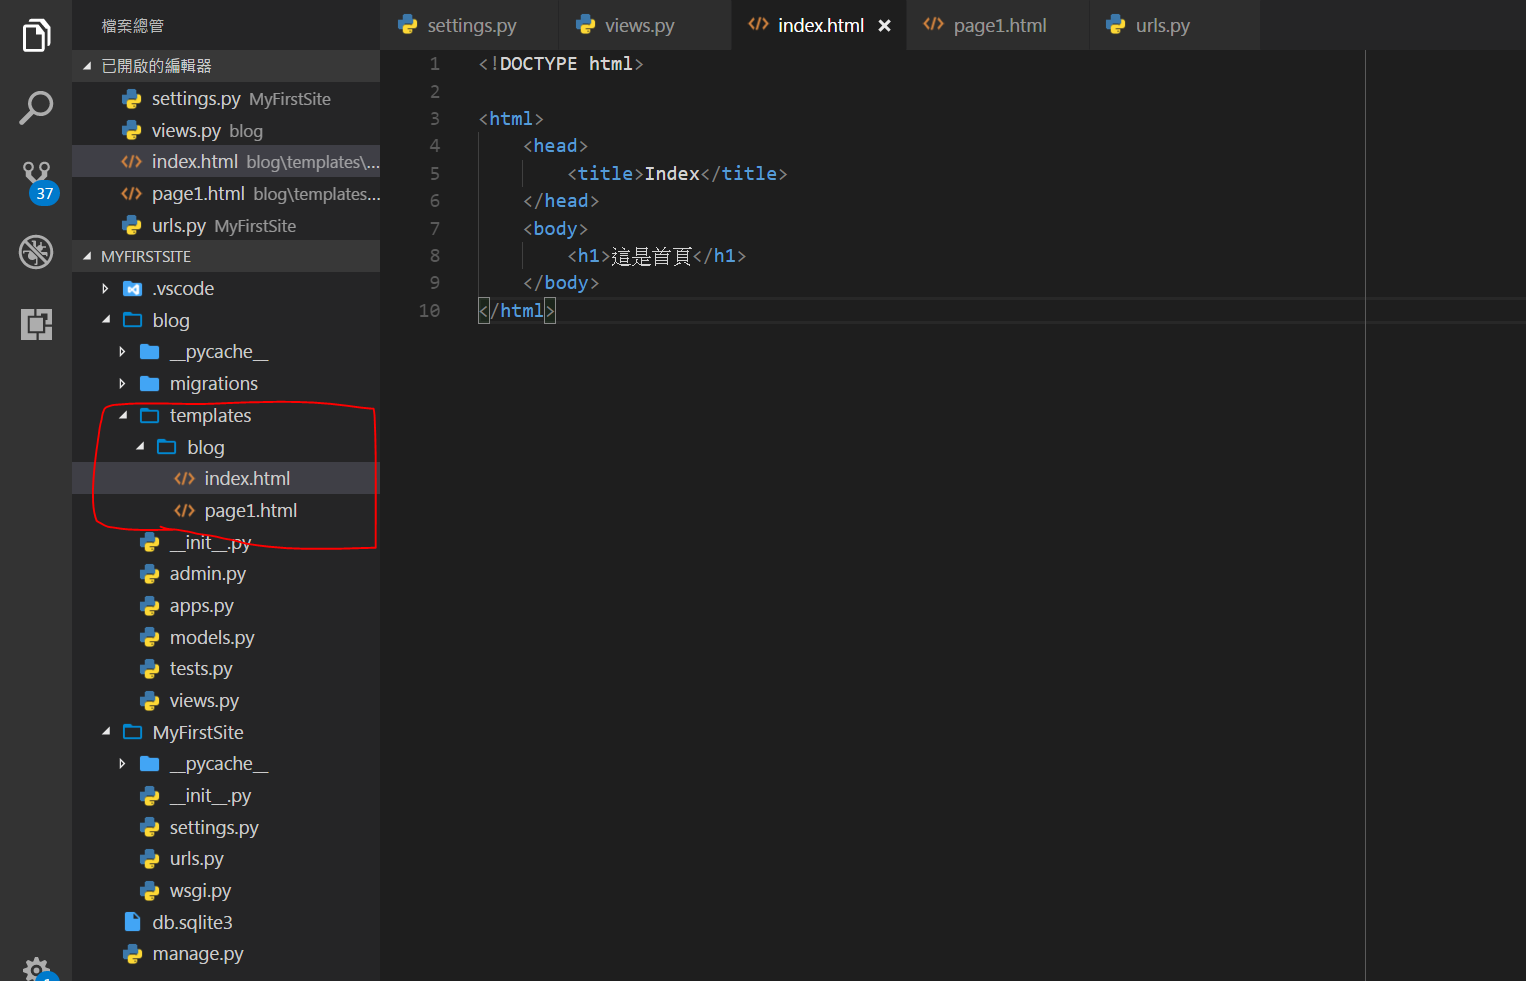

In [4]:
from IPython.display import Image
Image("images/P7.png")

讓 view 回傳我們寫的 html 檔

In [ ]:
# blog/views.py
from django.shortcuts import render
from django.http import HttpResponse

# Create your views here.

def index(request):
    return render(request, 'blog/index.html') # render 這個 function 第一個參數固定為 request，第二個參數為 html 位置

def page1(request):
    return render(request, 'blog/page1.html') # render 這個 function 第一個參數固定為 request，第二個參數為 html 位置

runserver 後，開啟瀏覽器觀看
* http://127.0.0.1:8000/
* http://127.0.0.1:8000/page1/
    
可以看到不同的頁面

四、view 傳資料給 template
============================

讓 render 吃第三個參數，型態是 dictionary，而 dictionary 內包我們想要傳給 template 組的資料

In [ ]:
# blog/views.py

def page1(request):
    context = { # 將資料傳給 template 組的動作，叫做 render。而 render 用的資料，叫做 context
        "name": "Lavender",
        "greet": "哈囉大家好",
    }
    return render(request, 'blog/page1.html', context)

修改 html 檔，在想要的位置上加入 {{ key }}，這樣 Django 會將指定位置上取代成我們想要的資料，並回傳給

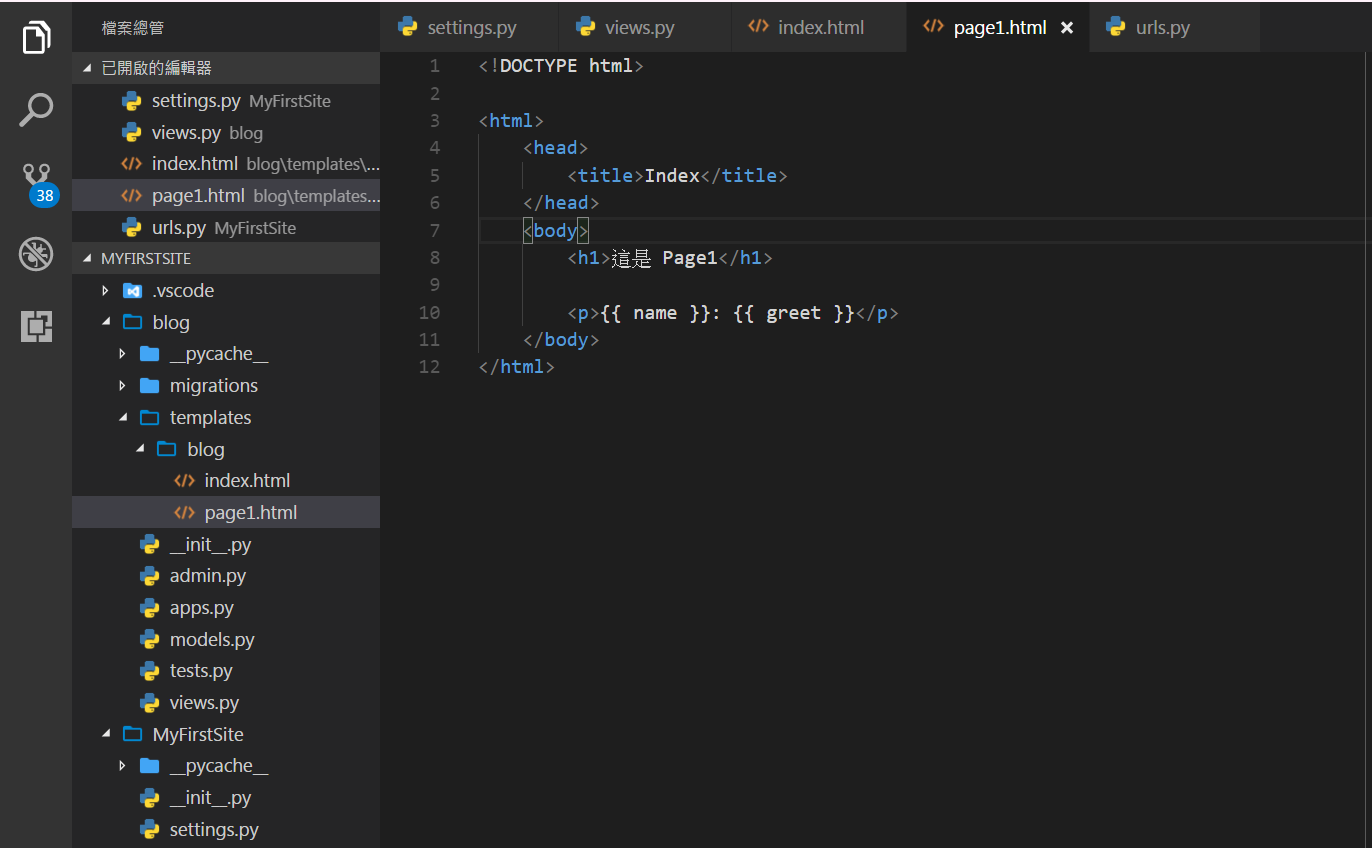

In [6]:
from IPython.display import Image
Image("images/P8.png")

References
==================
* https://docs.djangoproject.com/en/2.1/intro/tutorial01/